In [291]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import requests

# import api key
from config import key

# have the user input what they want to see
stock_input = input('What stock do you want to find?')
# start_input = input('What is the start day? ("YYYY-MM-DD")')
# end_input = input('What is the end day? ("YYYY-MM-DD")')
# for testing:
# stock_input = 'TSLA'
start_input = '2020-01-01'
end_input = '2022-01-01'

# request the api from polygon
# using the base url from polygon docs
base_url = 'https://api.polygon.io/v2/aggs/ticker/'

# create the url that will be put into json including api key
url = f'{base_url}{stock_input}/range/1/day/{start_input}/{end_input}?adjusted=false&sort=asc&limit=1900&apiKey={key}'
print(url)
# get the text in json format in result
result = requests.get(url).json()
# print(result)

What stock do you want to find?MSFT
https://api.polygon.io/v2/aggs/ticker/MSFT/range/1/day/2020-01-01/2022-01-01?adjusted=false&sort=asc&limit=1900&apiKey=P7xEmqFaamAMUwpkAMYQ3QZRDsA7H3Pz


In [292]:
result.keys()

dict_keys(['ticker', 'queryCount', 'resultsCount', 'adjusted', 'results', 'status', 'request_id', 'count'])

In [293]:
# print the ticker result
result['ticker']

'MSFT'

In [294]:
result['resultsCount']

436

In [295]:
# print the status of the stock
status = result['status']

In [296]:
# v: the trading volume
# vw: the volume weighted average price
# o: the open price for the day
# c: the close price for the day
# h: the high for the day
# l: the low for the day
# t: the unix msec timestamp
# n: the number of transactions for the day

In [297]:
# create a list to hold the close prices for the stock
close_prices = []

In [298]:
# create the loop to show me the close price for each day
for day in result['results']:
    for close, price in day.items():
        if close == 'c':
            close_prices.append(price)

In [299]:
x_position = len(close_prices)/2
y_position = np.max(close_prices)

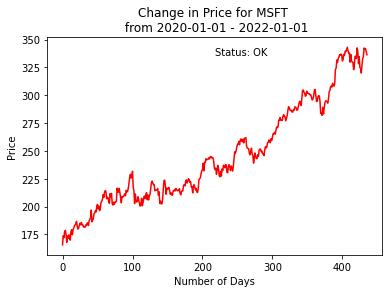

In [300]:
plt.plot(close_prices, color = 'r')
plt.xlabel('Number of Days')
plt.ylabel('Price')
plt.title(f'Change in Price for {stock_input} \n from {start_input} - {end_input}')

plt.text(x_position, y_position, (f'Status: {status}'), fontsize=10, verticalalignment='top')

plt.show()